# Ensembel Techniques
combining multiple models to improve accuracy

1. Bagging - RandomForest (Parallel Trees are created)
2. Boosting - Gradient Boost(Sequentially Corrective models are added)

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 : Read the Dataset

In [2]:
import pandas as pd
df = pd.read_csv("train_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Survived
0 - Not Survived

1- Survived

### Step 2 : Perform basic data quality check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
m = df.isna().sum()
m

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
df.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

### Step 3 : Seperating X and  Y (Survived)
1. PassengerId - it is just serial number
2. Cabin - because of lots of null values
3. Name - Dropping high cardinality (cardinality= too many unique values)
4. Ticket - High cardinality

In [9]:
x = df.drop(columns=["PassengerId","Cabin","Name","Ticket","Survived"])
y =df[["Survived"]]

In [10]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [11]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [12]:
y.value_counts()

Survived
0           549
1           342
dtype: int64

<Axes: xlabel='Survived'>

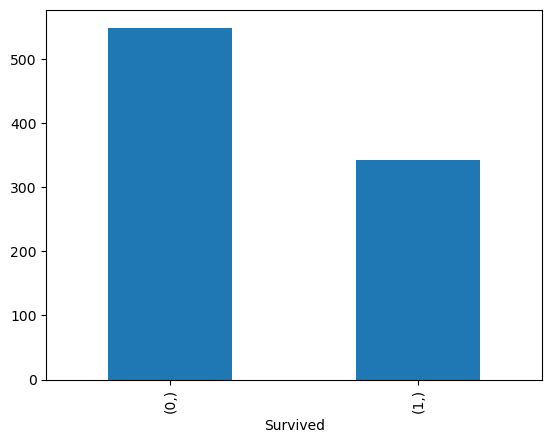

In [14]:
y.value_counts().plot(kind="bar")

### Step 4 : Create preprocessing pipeline for X

In [15]:
x.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [16]:
cat = list(x.columns[x.dtypes == "object"])
con = list(x.columns[x.dtypes != "object"])

In [17]:
cat

['Sex', 'Embarked']

In [18]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [20]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [21]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore",sparse_output=False)
)

In [22]:
pre = ColumnTransformer(
    [
        ("num",num_pipe,con),
        ("cat",cat_pipe,cat)
    ]
).set_output(transform="pandas")

In [23]:
x_pre = pre.fit_transform(x)
x_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,0.0,1.0
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,1.0,0.0,0.0,0.0,1.0
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,0.0,1.0,1.0,0.0,0.0


### Step 5 : Perform train test split

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,y,test_size=0.2,random_state=42)

In [25]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
331,-1.566107,1.240235,-0.474545,-0.473674,-0.074583,0.0,1.0,0.0,0.0,1.0
733,-0.369365,-0.488887,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0
382,0.827377,0.202762,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
704,0.827377,-0.258337,0.432793,-0.473674,-0.490280,0.0,1.0,0.0,0.0,1.0
813,0.827377,-1.795334,3.154809,2.008933,-0.018709,1.0,0.0,0.0,0.0,1.0


In [26]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [28]:
xtrain.shape

(712, 10)

In [29]:
xtest.shape

(179, 10)

### Step 6 : Model building

Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(
    n_estimators=1,
    max_depth=1,
    min_samples_leaf=5,
    min_samples_split=5,
    criterion="gini"
)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=1)

In [31]:
rfc.score(xtrain,ytrain)

0.7879213483146067

In [32]:
rfc.score(xtest,ytest)

0.7821229050279329

### Tuning Random Forest

In [33]:
params1 = {
    "max_depth" : [2,3,4,5],
    "min_samples_split" : [5,6,7,8],
    "criterion" : ["gini","entropy"]
}

### Randomised search cv is faster than grid search

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
model1 = RandomForestClassifier()
rscv1 = RandomizedSearchCV(
    estimator=model1,
    param_distributions= params1,
    scoring= "f1_macro",
    cv = 5
)
rscv1.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5],
                                        'min_samples_split': [5, 6, 7, 8]},
                   scoring='f1_macro')

In [37]:
rscv1.best_params_

{'min_samples_split': 5, 'max_depth': 5, 'criterion': 'entropy'}

In [38]:
rscv1.best_score_

0.8066004591095727

In [39]:
best_rf = rscv1.best_estimator_
best_rf

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

In [40]:
best_rf.score(xtrain,ytrain)

0.8539325842696629

In [41]:
best_rf.score(xtest,ytest)

0.8100558659217877

### Gradeint boosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
gbc = GradientBoostingClassifier(
    learning_rate= 0.5,
    n_estimators= 1,
    max_depth= 1,
    min_samples_leaf= 5,
    min_samples_split= 5
)
gbc.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.5, max_depth=1, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [44]:
gbc.score(xtrain,ytrain)

0.7879213483146067

In [45]:
gbc.score(xtest,ytest)

0.7821229050279329

### Tuning gradient boost

In [48]:
params2 = {
    "learning_rate" : [0.05,0.1,0.2],
    "max_depth" : [2,3,4,5],
    "min_samples_split" : [ 5,6,7,8],
    "n_estimators" :[50,100,200]
}

In [49]:
model2 = GradientBoostingClassifier()
rscv2 = RandomizedSearchCV(
    estimator= model2,
    param_distributions= params2,
    scoring= "f1_macro",
    cv = 5
)
rscv2.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'min_samples_split': [5, 6, 7, 8],
                                        'n_estimators': [50, 100, 200]},
                   scoring='f1_macro')

In [50]:
rscv2.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'max_depth': 2,
 'learning_rate': 0.05}

In [51]:
rscv2.best_score_

0.8051449101968908

In [52]:
best_gb = rscv2.best_estimator_
best_gb

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, min_samples_split=8,
                           n_estimators=200)

In [53]:
best_gb.score(xtrain,ytrain)

0.8707865168539326

In [55]:
best_gb.score(xtest,ytest)

0.8100558659217877

### Step 7 - Detail model evaluation

### Random forest

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay

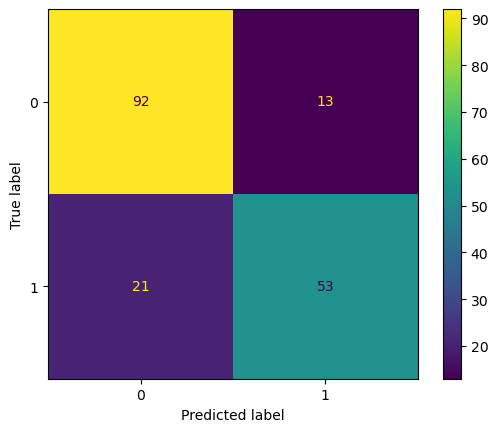

In [67]:
ConfusionMatrixDisplay.from_estimator(best_rf,xtest,ytest)

In [68]:
ypred_test_rf = best_rf.predict(xtest)
ypred_test_rf[0:5]

array([0, 0, 0, 1, 1])

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(ytest,ypred_test_rf))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



### Gradient Boost

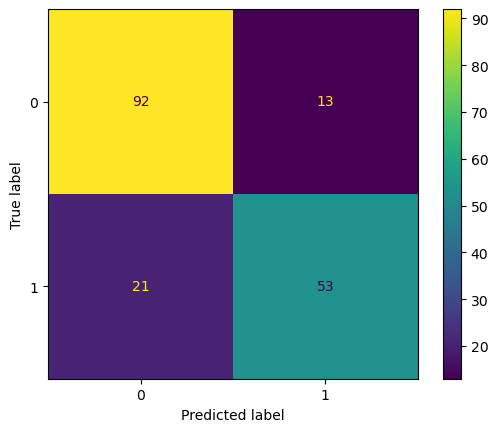

In [71]:
ConfusionMatrixDisplay.from_estimator(best_gb,xtest,ytest)

In [72]:
ypred_test_gb = best_gb.predict(xtest)

In [73]:
ypred_test_gb[0:5]

array([0, 0, 0, 1, 1])

In [74]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [75]:
print(classification_report(ytest,ypred_test_gb))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



### both random forest and gradient boost are performing equally well

### here lets select gradient boost for out of sample prediction

### because gradient boost was slightly better in cv results

### Step 8 -out of sample prediction

In [76]:
xnew = pd.read_csv("test_titanic.csv")
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

In [78]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0


In [79]:
preds = best_gb.predict(xnew_pre)
preds[0:5]

array([0, 1, 0, 0, 0])

In [ ]:
best_gb.

In [80]:
probs = best_gb.predict_proba(xnew_pre)
probs[0:5]

array([[0.85744286, 0.14255714],
       [0.33428578, 0.66571422],
       [0.82674078, 0.17325922],
       [0.87720497, 0.12279503],
       [0.51589526, 0.48410474]])

In [81]:
prob_sur = probs[0:,1]
prob_sur[0:5]

array([0.14255714, 0.66571422, 0.17325922, 0.12279503, 0.48410474])

### Save the results in new dataframe

In [83]:
res = xnew[["PassengerId"]]
res.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [84]:
res["Survived_pred"] =preds
res["Survived_prob"] = prob_sur


In [87]:
res = res.round(4)
res

,PassengerId,Survived_pred,Survived_prob
0,892,0,0.1426
1,893,1,0.6657
2,894,0,0.1733
3,895,0,0.1228
4,896,0,0.4841
...,...,...,...
413,1305,0,0.1228
414,1306,1,0.9519
415,1307,0,0.1101
416,1308,0,0.1228


In [88]:
res.to_csv("GBResults.csv",index=False)

In [89]:
res["Survived_pred"].value_counts()

0    284
1    134
Name: Survived_pred, dtype: int64

<Axes: >

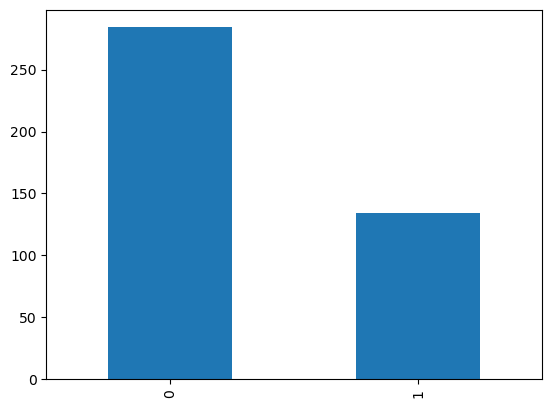

In [90]:
res["Survived_pred"].value_counts().plot(kind="bar")

### Feature Importances

In [91]:
imp = best_gb.feature_importances_
imp = pd.Series(imp,index=xtrain.columns)
imp

num__Pclass        0.179643
num__Age           0.125816
num__SibSp         0.031395
num__Parch         0.012461
num__Fare          0.086166
cat__Sex_female    0.270160
cat__Sex_male      0.281398
cat__Embarked_C    0.003177
cat__Embarked_Q    0.000000
cat__Embarked_S    0.009785
dtype: float64

In [92]:
imp.sort_values()

cat__Embarked_Q    0.000000
cat__Embarked_C    0.003177
cat__Embarked_S    0.009785
num__Parch         0.012461
num__SibSp         0.031395
num__Fare          0.086166
num__Age           0.125816
num__Pclass        0.179643
cat__Sex_female    0.270160
cat__Sex_male      0.281398
dtype: float64

<Axes: >

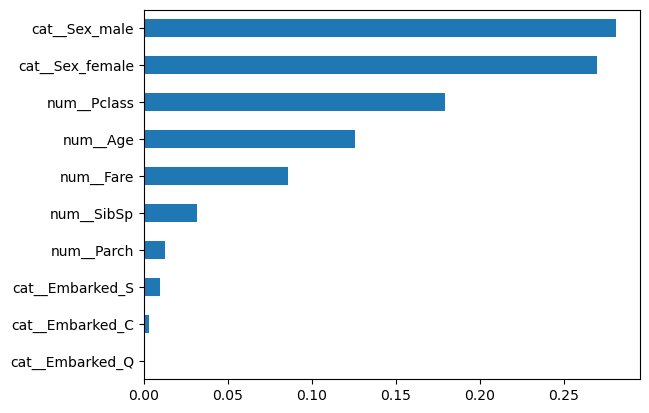

In [94]:
imp.sort_values().plot(kind="barh")